In [38]:
import numpy as np
import pandas as pd
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [39]:
set_config(transform_output="pandas")

In [40]:
#load data

penguins = pd.read_csv("dataset/penguins.csv")
penguins

,bill_length_mm,flipper_length_mm
0,39.1,181
1,39.5,186
2,40.3,195
3,36.7,193
4,39.3,190
...,...,...
337,55.8,207
338,43.5,202
339,49.6,193
340,50.8,210


In [41]:
min_max_values = penguins.agg(['min','max'])
min_max_values

,bill_length_mm,flipper_length_mm
min,32.1,172
max,59.6,231


In [42]:
penguins_copy = penguins.copy()

In [43]:
scaler = StandardScaler()
standardized_penguins = scaler.fit_transform(penguins_copy)

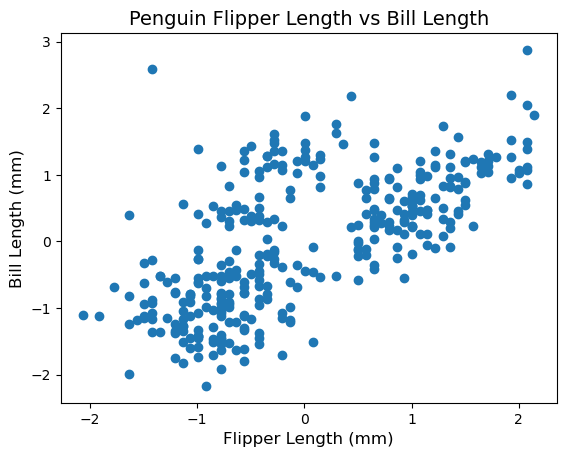

In [44]:
# Scatter plot for bill_length_mm vs flipper_length_mm
plt.scatter(standardized_penguins['flipper_length_mm'], standardized_penguins['bill_length_mm'])

# Adding labels and title
plt.title('Penguin Flipper Length vs Bill Length', fontsize=14)
plt.ylabel('Bill Length (mm)', fontsize=12)
plt.xlabel('Flipper Length (mm)', fontsize=12)

# Display the plot
plt.show()

In [45]:
#perform k-means clustering

kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)

In [46]:
clusters = kmeans.fit(standardized_penguins)

c:\Users\jcp_2\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [47]:
standardized_penguins_with_clusters = standardized_penguins.copy()

In [48]:
standardized_penguins_with_clusters["Clusters"] = clusters.labels_
standardized_penguins_with_clusters

,bill_length_mm,flipper_length_mm,Clusters
0,-0.884499,-1.418347,1
1,-0.811126,-1.062250,1
2,-0.664380,-0.421277,1
3,-1.324737,-0.563715,1
4,-0.847812,-0.777373,1
...,...,...,...
337,2.178824,0.433355,2
338,-0.077396,0.077258,2
339,1.041543,-0.563715,2
340,1.261662,0.647013,0


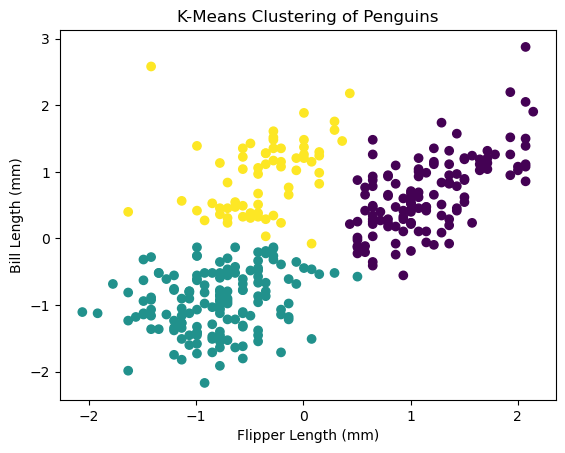

In [49]:
# Plot the clusters
plt.scatter(standardized_penguins_with_clusters['flipper_length_mm'], standardized_penguins_with_clusters['bill_length_mm'], c=standardized_penguins_with_clusters['Clusters'])
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.title('K-Means Clustering of Penguins')
plt.show()

In [50]:
clusters.inertia_

157.8153218752378

In [51]:
penguin_clust_ks = pd.DataFrame(columns=['k', 'wssd'])

for k in range(1, 11):
    elbow_kmeans = KMeans(n_clusters=k, random_state=123, n_init=10)
    elbow_kmeans.fit(standardized_penguins)
    penguin_clust_ks = pd.concat([penguin_clust_ks, pd.DataFrame({'k': [k], 'wssd': [elbow_kmeans.inertia_]})], ignore_index=True)

# Display the DataFrame
penguin_clust_ks


c:\Users\jcp_2\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\jcp_2\AppData\Local\Temp\ipykernel_8212\3801214641.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  penguin_clust_ks = pd.concat([penguin_clust_ks, pd.DataFrame({'k': [k], 'wssd': [elbow_kmeans.inertia_]})], ignore_index=True)
c:\Users\jcp_2\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than a

,k,wssd
0,1,684.000000
1,2,247.016625
2,3,157.815322
3,4,118.766244
4,5,91.476109
5,6,78.716593
6,7,66.722277
7,8,57.914115
8,9,52.458720
9,10,48.642403


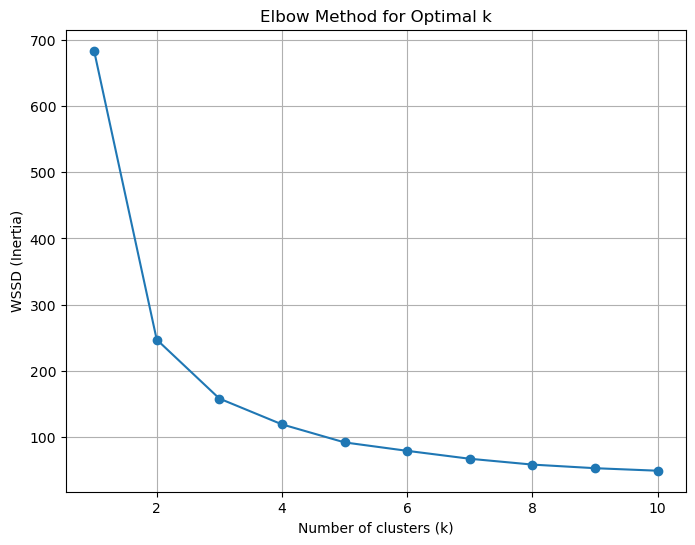

In [52]:
# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(penguin_clust_ks['k'], penguin_clust_ks['wssd'], marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WSSD (Inertia)")
plt.grid(True)
plt.show()
